In [24]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load and split data

In [3]:
data_file=pd.read_csv('G:\LebanseUni\M2\S1\AIDE506-Advanced Machine learining Topics\Project\Data\processed_data.csv')
data_file.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1


In [4]:
y=data_file["Churn"]
x=data_file.drop("Churn" , axis=1)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470


### split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## train the model

In [6]:
import mlflow
import mlflow.sklearn

In [21]:
# Set MLflow experiment name. This will get created if it doesn't exist
experiment_name = "RandomForestExperiment1"
mlflow.set_experiment(experiment_name)

2025/03/09 16:51:46 INFO mlflow.tracking.fluent: Experiment with name 'RandomForestExperiment1' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///g:/LebanseUni/M2/S1/AIDE506-Advanced%20Machine%20learining%20Topics/Project/notebooks/mlruns/311421148046968586', creation_time=1741531906362, experiment_id='311421148046968586', last_update_time=1741531906362, lifecycle_stage='active', name='RandomForestExperiment1', tags={}>

In [ ]:
random = RandomForestClassifier()



RandomForestClassifier(random_state=42)

In [ ]:
with mlflow.start_run():
    rf_model = RandomForestClassifier(n_estimators=100,max_depth=20, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    # Log parameters, metrics, and the model itself
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 20)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(rf_model, "random_forest_model")
    print(f"Random Forest Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    mlflow.end_run()

2025/03/09 16:38:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest Accuracy: 0.7970

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [ ]:
print((y == 1).sum())
print((y ==0).sum())

1869
5174


# find best hyper parameters

## Train the base model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [7]:
data_file=pd.read_csv('G:\LebanseUni\M2\S1\AIDE506-Advanced Machine learining Topics\Project\Data\processed_data.csv')
y=data_file["Churn"]
x=data_file.drop("Churn" , axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### SMOT

In [17]:
X_resampled.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000
mean,0.468342,0.159377,0.402247,0.224988,-0.188951,0.900193,0.964234,0.847148,0.640768,0.807395,0.803770,0.652127,0.964234,0.975955,0.495288,0.619865,1.588328,0.106022,-0.101802
std,0.499027,0.366049,0.490381,0.417600,0.969651,0.299760,0.949824,0.678513,0.836119,0.891246,0.890454,0.842344,0.911121,0.912102,0.761523,0.485449,1.006951,0.957544,0.961337
min,0.000000,0.000000,0.000000,0.000000,-1.318165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.545860,-0.999120
25%,0.000000,0.000000,0.000000,0.000000,-1.079833,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.644768,-0.876908
50%,0.000000,0.000000,0.000000,0.000000,-0.457444,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.331971,-0.493460
75%,1.000000,0.000000,1.000000,0.000000,0.636413,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.867175,0.425943
max,1.000000,1.000000,1.000000,1.000000,1.613701,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.789367,2.826743


In [36]:
def train_and_log_model(model, X_train, y_train, X_test, y_test,note):
    with mlflow.start_run():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Compute classification report and confusion matrix
        class_report = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Log classification metrics
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", class_report["weighted avg"]["precision"])
        mlflow.log_metric("recall", class_report["weighted avg"]["recall"])
        mlflow.log_metric("f1-score", class_report["weighted avg"]["f1-score"])
        

        # Log parameters of the model (if applicable)
        if hasattr(model, "get_params"):
            params = model.get_params()
            for param, value in params.items():
                mlflow.log_param(param, value)


        #log 
        class_report_text = classification_report(y_test, y_pred)
        with open("classification_report.txt", "w") as f:
            f.write(class_report_text)
        mlflow.log_artifact("classification_report.txt")
        # Log model
        mlflow.sklearn.log_model(model, "model")

        # Log confusion matrix as an image
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")

        mlflow.set_tag("Experiment Notes", note)
        print("classification_report",class_report)
        print(f"Model logged successfully with accuracy={accuracy:.4f}")

### 1. DT

In [18]:
# Set MLflow experiment name. This will get created if it doesn't exist
experiment_name = "BaseModel_RandomForestExperiment"
experiment_id = mlflow.create_experiment(experiment_name)
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='file:///g:/LebanseUni/M2/S1/AIDE506-Advanced%20Machine%20learining%20Topics/Project/notebooks/mlruns/112277570689753284', creation_time=1742034586638, experiment_id='112277570689753284', last_update_time=1742034586638, lifecycle_stage='active', name='BaseModel_RandomForestExperiment', tags={}>

In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2']
}
rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator= rf, param_distributions= param_grid, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy')

In [22]:

with mlflow.start_run():
    random_search.fit(X_train, y_train)
    mlflow.log_param("best parameters", random_search.best_params_)
    print("Best parameters:", random_search.best_params_)

Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


#### train and log

2025/03/15 13:20:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


classification_report {'0': {'precision': 0.8402471315092674, 'recall': 0.918918918918919, 'f1-score': 0.8778238819732596, 'support': 1036.0}, '1': {'precision': 0.6956521739130435, 'recall': 0.514745308310992, 'f1-score': 0.5916795069337443, 'support': 373.0}, 'accuracy': 0.8119233498935415, 'macro avg': {'precision': 0.7679496527111555, 'recall': 0.7168321136149555, 'f1-score': 0.734751694453502, 'support': 1409.0}, 'weighted avg': {'precision': 0.8019689773691739, 'recall': 0.8119233498935415, 'f1-score': 0.802073809659747, 'support': 1409.0}}
Model logged successfully with accuracy=0.8119


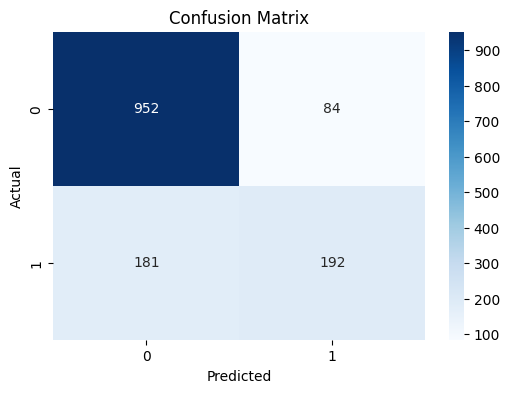

In [37]:
num_models = 1
sample_size = 4000
np.random.seed(0)
best_params = {
    'n_estimators': 200,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 20
}
#sample_weights = np.ones(X_resampled.shape[0])/X_resampled.shape[0]
model = RandomForestClassifier(**best_params)
#model.fit(X_resampled, y_resampled, sample_weight=sample_weights)
train_and_log_model(model,X_train,y_train,X_test,y_test,"training model on original preproccessed data data")


#### primary goal is detecting and preventing clients from churning, the most important metric is Recall
  precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

#### try to balance the data

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(X_resampled)

      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          0              0        0           1 -0.463037             1   
1          0              0        0           0  0.880735             1   
2          1              0        1           0 -1.277445             0   
3          1              0        0           0 -1.155283             1   
4          1              0        0           1 -1.318165             1   
...      ...            ...      ...         ...       ...           ...   
8271       1              0        0           0 -1.277445             1   
8272       1              0        0           0 -0.677904             1   
8273       0              0        1           1 -0.587234             1   
8274       0              0        0           0  1.482050             1   
8275       1              1        1           0  0.088132             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                

2025/03/15 13:23:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


classification_report {'0': {'precision': 0.9043381535038932, 'recall': 0.7847490347490348, 'f1-score': 0.8403100775193798, 'support': 1036.0}, '1': {'precision': 0.5627450980392157, 'recall': 0.7694369973190348, 'f1-score': 0.6500566251415628, 'support': 373.0}, 'accuracy': 0.7806955287437899, 'macro avg': {'precision': 0.7335416257715545, 'recall': 0.7770930160340348, 'f1-score': 0.7451833513304713, 'support': 1409.0}, 'weighted avg': {'precision': 0.8139093318656216, 'recall': 0.7806955287437899, 'f1-score': 0.789944898146118, 'support': 1409.0}}
Model logged successfully with accuracy=0.7807


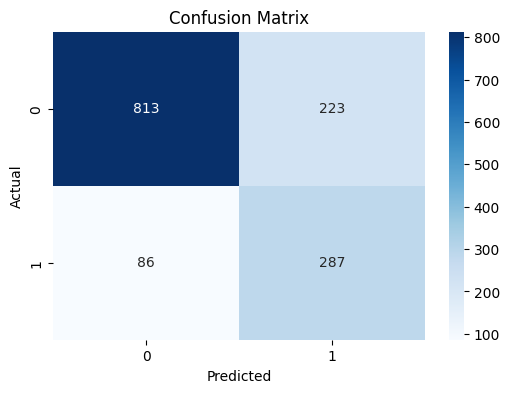

In [38]:
model = RandomForestClassifier(**best_params)
train_and_log_model(model,X_resampled,y_resampled,X_test,y_test,"training model on SMOT balanced data data data")

#### Discus 
Accuracy Decreased from accuracy=0.8119 =>  accuracy=0.7807
but we clearly can see that recall of the positive class increased .51=> .77 
this mean we have less false nigative (client who leaved with out being detected by the model)


...
old 



                precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

new 




                precision    recall  f1-score   support

           0       0.90      0.78      0.84      1036
           1       0.56      0.77      0.65       373

    accuracy                           0.78      1409
   macro avg       0.73      0.78      0.75      1409
weighted avg       0.81      0.78      0.79      140

### LR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define parameter grid
param_grid = [
    {'C': np.logspace(-4, 4, 10), 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},  # liblinear supports only l1, l2
    {'C': np.logspace(-4, 4, 10), 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.9]}  # saga supports l1, l2, elasticnet
]

# Initialize model
model = LogisticRegression(max_iter=1000)

# GridSearchCV with valid params
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')

# Fit model
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_}")


Best parameters: {'C': np.float64(0.3593813663804626), 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best CV accuracy: 0.799254689905926


f:\Users\faiz\anaconda3\envs\AIDE506\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [ ]:
# Best hyperparameters
best_params = {
    'C': 0.3593813663804626,
    'l1_ratio': 0.1,
    'penalty': 'l1',
    'solver': 'saga'
}

# Initialize model with best parameters
logistic_model = LogisticRegression(**best_params, max_iter=1000)

# Train the model
logistic_model.fit(X_resampled, y_resampled)

f:\Users\faiz\anaconda3\envs\AIDE506\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


LogisticRegression(C=0.3593813663804626, l1_ratio=0.1, max_iter=1000,
                   penalty='l1', solver='saga')

In [ ]:
# Set MLflow experiment name. This will get created if it doesn't exist
experiment_name = "BaseLogisticRegExperiment"
experiment_id = mlflow.create_experiment(experiment_name)
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='file:///g:/LebanseUni/M2/S1/AIDE506-Advanced%20Machine%20learining%20Topics/Project/notebooks/mlruns/958330468650739237', creation_time=1742042783834, experiment_id='958330468650739237', last_update_time=1742042783834, lifecycle_stage='active', name='BaseLogisticRegExperiment', tags={}>

#### Train and log

f:\Users\faiz\anaconda3\envs\AIDE506\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
2025/03/15 14:50:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


classification_report {'0': {'precision': 0.8570119156736938, 'recall': 0.9025096525096525, 'f1-score': 0.8791725434884814, 'support': 1036.0}, '1': {'precision': 0.6823899371069182, 'recall': 0.5817694369973191, 'f1-score': 0.6280752532561505, 'support': 373.0}, 'accuracy': 0.8176011355571328, 'macro avg': {'precision': 0.7697009263903061, 'recall': 0.7421395447534858, 'f1-score': 0.753623898372316, 'support': 1409.0}, 'weighted avg': {'precision': 0.8107848056627589, 'recall': 0.8176011355571328, 'f1-score': 0.8127003722630312, 'support': 1409.0}}
Model logged successfully with accuracy=0.8176


f:\Users\faiz\anaconda3\envs\AIDE506\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
2025/03/15 14:50:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


classification_report {'0': {'precision': 0.9245049504950495, 'recall': 0.721042471042471, 'f1-score': 0.8101952277657267, 'support': 1036.0}, '1': {'precision': 0.519134775374376, 'recall': 0.8364611260053619, 'f1-score': 0.6406570841889117, 'support': 373.0}, 'accuracy': 0.751596877217885, 'macro avg': {'precision': 0.7218198629347128, 'recall': 0.7787517985239165, 'f1-score': 0.7254261559773192, 'support': 1409.0}, 'weighted avg': {'precision': 0.8171926188271921, 'recall': 0.751596877217885, 'f1-score': 0.7653139449025954, 'support': 1409.0}}
Model logged successfully with accuracy=0.7516


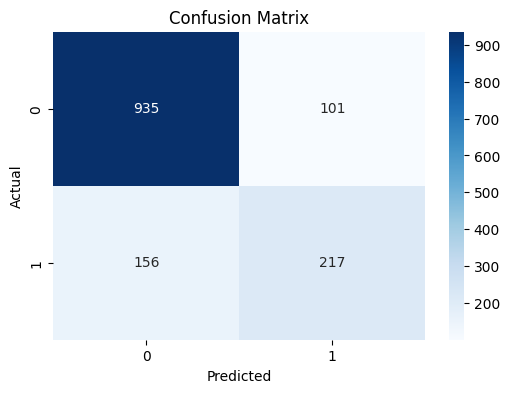

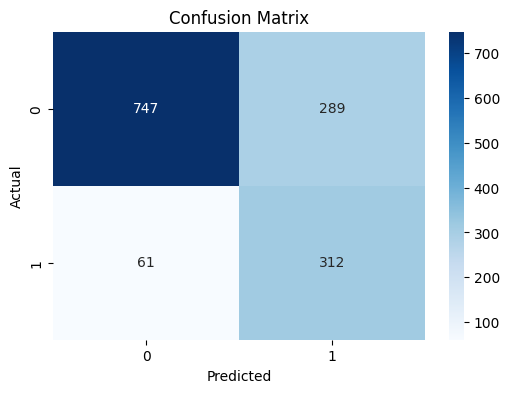

In [48]:
best_params = {
    'C': 0.3593813663804626,
    'l1_ratio': 0.1,
    'penalty': 'l1',
    'solver': 'saga'
}


logistic_model = LogisticRegression(**best_params, max_iter=1000)
train_and_log_model(logistic_model,X_train,y_train,X_test,y_test,"Training the Logistic Model on Original preproccessed data")
logistic_model = LogisticRegression(**best_params, max_iter=1000)
train_and_log_model(logistic_model,X_resampled,y_resampled,X_test,y_test,"Training the Logistic Model on SMOTE  data")

#### Discus
old


                precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



new 


              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.84      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409

### XGBoost


In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [3, 5, 7, 9, 12],  # Depth of trees
    'learning_rate': np.logspace(-3, 0, 10),  # Shrinks contribution of trees
    'subsample': [0.6, 0.8, 1.0],  # Percentage of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Percentage of features used per tree
    'gamma': [0, 0.1, 0.3, 0.5, 1],  # Minimum loss reduction for split
    'lambda': np.logspace(-3, 1, 5),  # L2 regularization
    'alpha': np.logspace(-3, 1, 5)  # L1 regularization
}

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of different settings to try
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the search on training data
random_search.fit(X_resampled, y_resampled)

# Print best parameters
print(f"Best parameters: {random_search.best_params_}")
print(f"Best CV accuracy: {random_search.best_score_}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


f:\Users\faiz\anaconda3\envs\AIDE506\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:15:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 12, 'learning_rate': np.float64(0.21544346900318823), 'lambda': np.float64(10.0), 'gamma': 0, 'colsample_bytree': 1.0, 'alpha': np.float64(0.001)}
Best CV accuracy: 0.8316906753068581


In [52]:
# Make predictions using the best model found by RandomizedSearchCV
y_pred = random_search.best_estimator_.predict(X_test)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Print a classification report with precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.7644

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1036
           1       0.55      0.61      0.58       373

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.76      0.77      1409


Confusion Matrix:
[[849 187]
 [145 228]]


# Stacked